In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('codon_usage.csv')
df['Kingdom'].value_counts()

/var/folders/sy/6gx6mfld0sscbv1zzxzy4ftr0000gn/T/ipykernel_69994/795780567.py:6: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('codon_usage.csv')


Kingdom
bct    2920
vrl    2832
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: count, dtype: int64

In [33]:
# preprocessing
if 'DNAtype' in df.columns:
    df = df[df['DNAtype']==0]   
    df = df.drop(columns=['DNAtype'])

# Kingdom code to full name mapping
kingdom_names = {
    'arc': 'Archaea',
    'bct': 'Bacteria',
    'phg': 'Bacteriophage',
    'plm': 'Plasmid',
    'pln': 'Plant',
    'inv': 'Invertebrate',
    'vrt': 'Vertebrate',
    'mam': 'Mammal',
    'rod': 'Rodent',
    'pri': 'Primate',
    'vrl': 'Virus'
}

# Add full kingdom names to dataframe
df['Kingdom_Full'] = df['Kingdom'].map(kingdom_names)
animals = ['inv', 'vrt', 'mam', 'rod', 'pri']
df['Kingdom_Full'] = df.apply(lambda row: 'Animal' if row['Kingdom'] in animals else row['Kingdom_Full'], axis=1)

# Only keep some rows
rows_to_keep = ['Animal','Plant','Bacteria','Virus']
df = df[df['Kingdom_Full'].isin(rows_to_keep)]
df = df.drop(columns=['Kingdom'])
df['Kingdom_Full'].value_counts()

Kingdom_Full
Bacteria    2918
Virus       2832
Animal      1630
Plant       1523
Name: count, dtype: int64

In [34]:
# Summary Statistics on the Dataset

print("="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"Total number of samples: {len(df)}")
print(f"Total number of features: {df.shape[1]}")
print(f"\nDataset shape: {df.shape}")

# Kingdom distribution
print("\n" + "="*70)
print("KINGDOM DISTRIBUTION")
print("="*70)
kingdom_counts = df['Kingdom_Full'].value_counts()
print(kingdom_counts)
print(f"\nPercentage distribution:")
print((kingdom_counts / len(df) * 100).round(2))

# Metadata columns info
print("\n" + "="*70)
print("METADATA COLUMNS")
print("="*70)
metadata_cols_present = ['SpeciesID', 'Ncodons', 'SpeciesName']
metadata_cols_present = [col for col in metadata_cols_present if col in df.columns]
for col in metadata_cols_present:
    if col == 'Ncodons':
        print(f"\n{col} (sequence length statistics):")
        print(df[col].describe())
    elif col == 'SpeciesID':
        print(f"\n{col}: {df[col].nunique()} unique species")
    elif col == 'SpeciesName':
        print(f"\n{col}: {df[col].nunique()} unique species names")

# Codon frequency statistics
print("\n" + "="*70)
print("CODON FREQUENCY STATISTICS")
print("="*70)
numeric_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
metadata_numeric = ['SpeciesID', 'Ncodons', 'PC1', 'PC2', 'PC3']
codon_cols_stats = [col for col in numeric_cols_all if col not in metadata_numeric]

codon_stats = df[codon_cols_stats].describe()
print(f"Number of codon columns: {len(codon_cols_stats)}")
print(f"\nCodon frequency statistics (across all {len(codon_cols_stats)} codons):")
print(codon_stats)

# Per-kingdom statistics
print("\n" + "="*70)
print("STATISTICS BY KINGDOM")
print("="*70)
for kingdom in sorted(df['Kingdom_Full'].unique()):
    kingdom_df = df[df['Kingdom_Full'] == kingdom]
    print(f"\n{kingdom}:")
    print(f"  Number of samples: {len(kingdom_df)}")
    print(f"  Mean sequence length: {kingdom_df['Ncodons'].mean():.1f}")
    print(f"  Std sequence length: {kingdom_df['Ncodons'].std():.1f}")
    codon_mean = kingdom_df[codon_cols_stats].mean().mean()
    codon_std = kingdom_df[codon_cols_stats].std().mean()
    print(f"  Mean codon frequency: {codon_mean:.4f}")
    print(f"  Mean codon std: {codon_std:.4f}")

# Missing values check
print("\n" + "="*70)
print("MISSING VALUES")
print("="*70)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("No missing values detected!")
else:
    print(missing[missing > 0])


DATASET OVERVIEW
Total number of samples: 8903
Total number of features: 68

Dataset shape: (8903, 68)

KINGDOM DISTRIBUTION
Kingdom_Full
Bacteria    2918
Virus       2832
Animal      1630
Plant       1523
Name: count, dtype: int64

Percentage distribution:
Kingdom_Full
Bacteria    32.78
Virus       31.81
Animal      18.31
Plant       17.11
Name: count, dtype: float64

METADATA COLUMNS

SpeciesID: 8903 unique species

Ncodons (sequence length statistics):
count    8.903000e+03
mean     1.099803e+05
std      8.623955e+05
min      1.000000e+03
25%      1.790000e+03
50%      3.547000e+03
75%      1.284150e+04
max      4.066258e+07
Name: Ncodons, dtype: float64

SpeciesName: 8891 unique species names

CODON FREQUENCY STATISTICS
Number of codon columns: 62

Codon frequency statistics (across all 62 codons):
               UUA          UUG          CUU          CUC          CUA  \
count  8903.000000  8903.000000  8903.000000  8903.000000  8903.000000   
mean      0.013587     0.015570     0.

In [ ]:
df.to_csv('preprocessed.csv', index=False)

,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,Kingdom_Full
0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000,Virus
1,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000,Virus
2,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144,Virus
3,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000,Virus
4,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131,Virus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13017,9597,41117,Pan paniscus,0.02342,0.02846,0.00987,0.01527,0.01542,0.02296,0.00924,...,0.01459,0.01318,0.01384,0.01824,0.02196,0.03478,0.00046,0.00092,0.00158,Animal
13019,9598,328023,Pan troglodytes,0.0138,0.022,0.00569,0.01047,0.01147,0.02219,0.00674,...,0.01339,0.01351,0.01751,0.02667,0.02191,0.04283,0.00065,0.00060,0.00165,Animal
13021,9600,96254,Pongo pygmaeus,0.01739,0.02236,0.00887,0.01221,0.01307,0.01871,0.00824,...,0.01497,0.01232,0.01886,0.02383,0.02546,0.03319,0.00149,0.00068,0.00150,Animal
13023,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,...,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638,Animal


---

Found 63 codon columns
Sample codons: ['UUA', 'UUG', 'CUU', 'CUC', 'CUA']

Explained variance ratio: [0.3768578  0.07118012]
Total variance explained: 44.80%


/var/folders/sy/6gx6mfld0sscbv1zzxzy4ftr0000gn/T/ipykernel_69994/3211353479.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PC1'] = X_pca[:, 0]
/var/folders/sy/6gx6mfld0sscbv1zzxzy4ftr0000gn/T/ipykernel_69994/3211353479.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PC2'] = X_pca[:, 1]


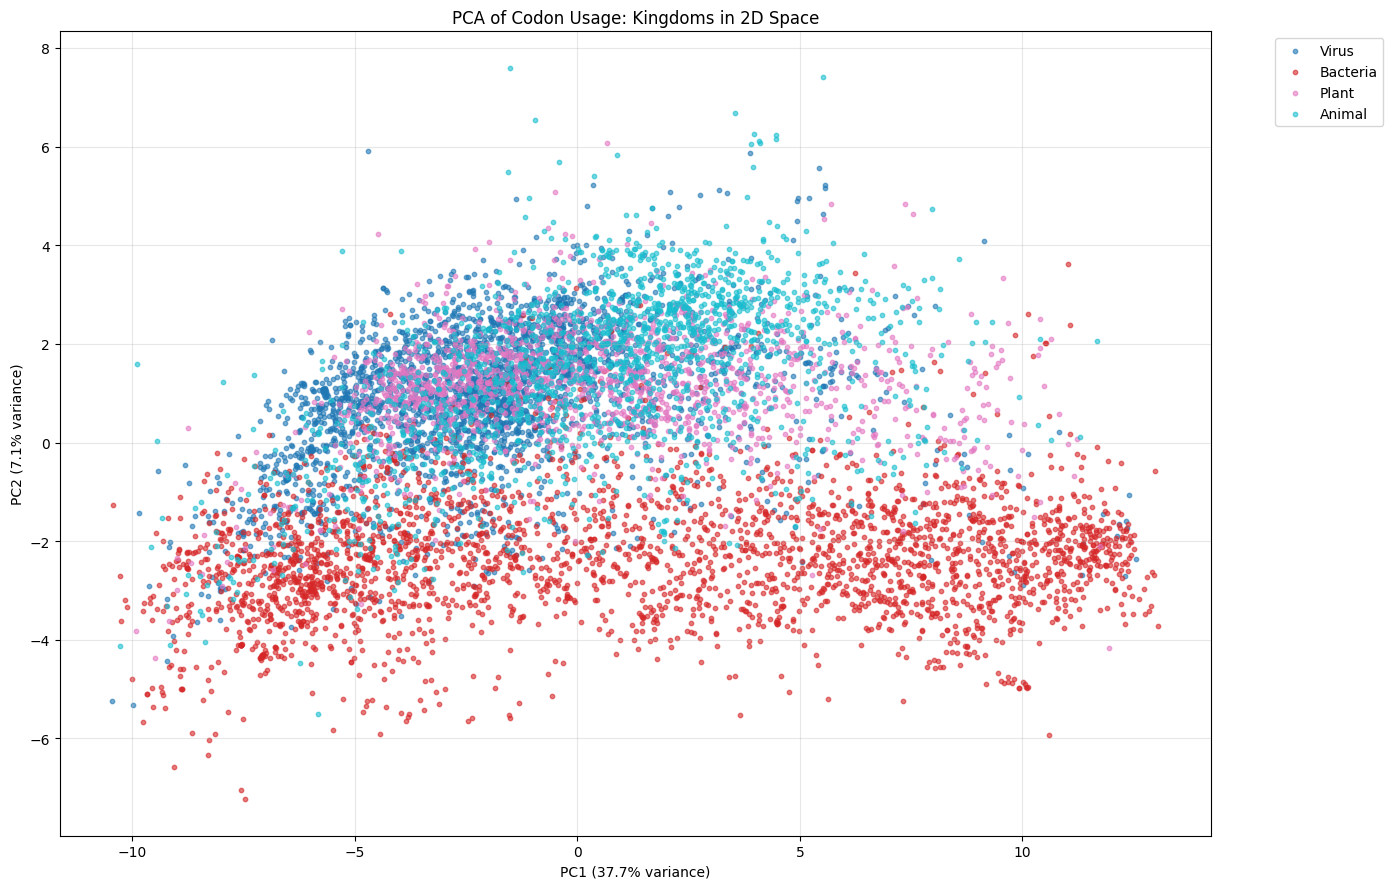

In [24]:
# PCA Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove metadata numeric columns like SpeciesID, Ncodons, DNAtype
metadata_numeric = ['SpeciesID', 'Ncodons', 'PC1', 'PC2']
codon_cols = [col for col in numeric_cols if col not in metadata_numeric]

print(f"Found {len(codon_cols)} codon columns")
print(f"Sample codons: {codon_cols[:5]}")

# Prepare data for PCA
X = df[codon_cols].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components back to dataframe
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

print(f"\nExplained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")

# Visualize the clustering by Kingdom
plt.figure(figsize=(14, 9))
kingdoms = df['Kingdom_Full'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(kingdoms)))

for kingdom, color in zip(kingdoms, colors):
    mask = df['Kingdom_Full'] == kingdom
    plt.scatter(df.loc[mask, 'PC1'], df.loc[mask, 'PC2'], 
                label=kingdom, alpha=0.6, s=10, c=[color])

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('PCA of Codon Usage: Kingdoms in 2D Space')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


/var/folders/sy/6gx6mfld0sscbv1zzxzy4ftr0000gn/T/ipykernel_69994/851910415.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PC3'] = X_pca_3d[:, 2]


3D PCA Explained variance ratio: [0.38293615 0.07232818 0.04974706]
Total variance explained: 50.50%


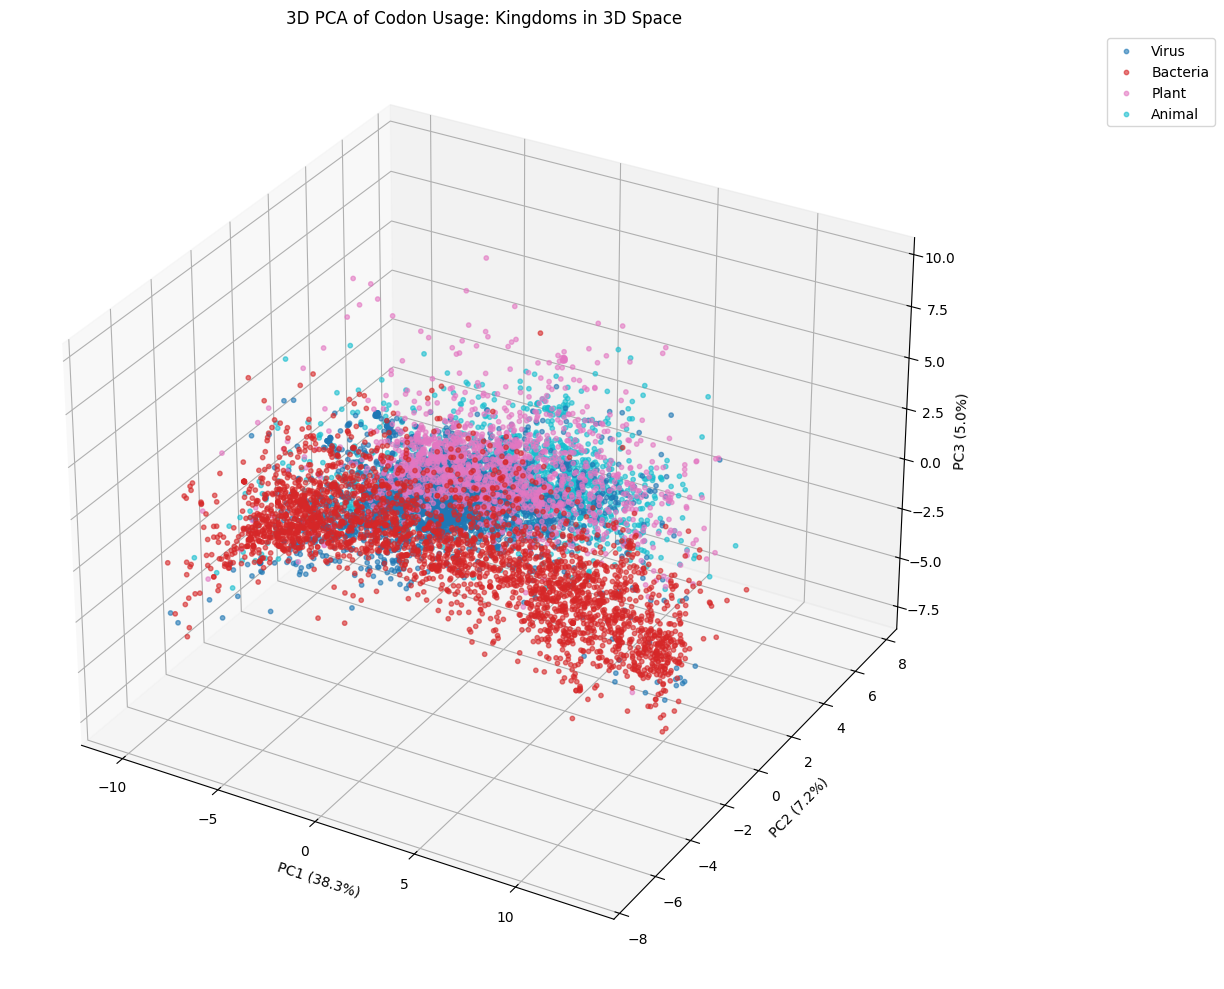

In [23]:
# 3D PCA Visualization
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Add PC3 to dataframe
df['PC3'] = X_pca_3d[:, 2]

print(f"3D PCA Explained variance ratio: {pca_3d.explained_variance_ratio_}")
print(f"Total variance explained: {pca_3d.explained_variance_ratio_.sum():.2%}")

# Create 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

kingdoms = df['Kingdom_Full'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(kingdoms)))

for kingdom, color in zip(kingdoms, colors):
    mask = df['Kingdom_Full'] == kingdom
    ax.scatter(df.loc[mask, 'PC1'], df.loc[mask, 'PC2'], df.loc[mask, 'PC3'],
               label=kingdom, alpha=0.6, s=10, c=[color])

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})')
ax.set_title('3D PCA of Codon Usage: Kingdoms in 3D Space')
ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


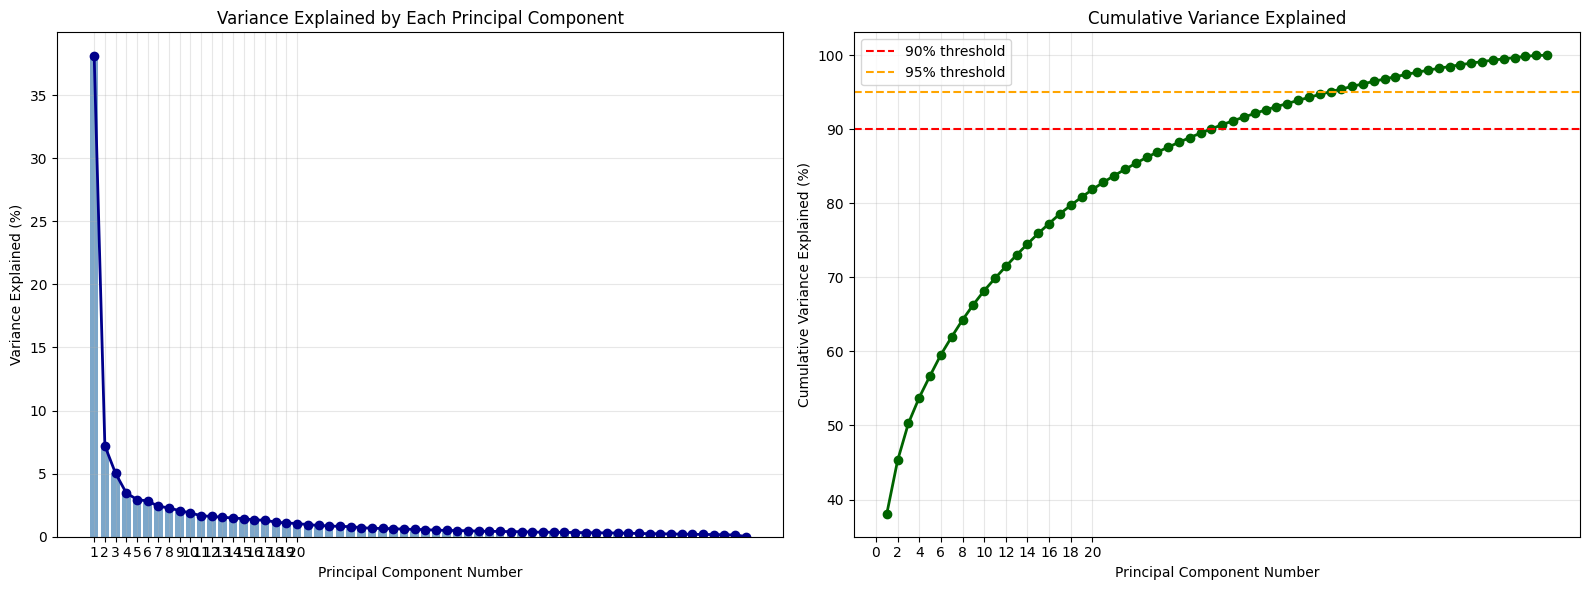

Total number of components: 62

Top 5 components explain: 56.73%
Top 10 components explain: 68.21%

Components needed for 90% variance: 31
Components needed for 95% variance: 42


In [13]:
# Scree Plot: Variance Explained vs PC Number
# Fit PCA with all components to see full variance distribution
pca_full = PCA()
pca_full.fit(X_scaled)

# Create scree plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Variance explained by each PC
pc_numbers = range(1, len(pca_full.explained_variance_ratio_) + 1)
ax1.bar(pc_numbers, pca_full.explained_variance_ratio_ * 100, alpha=0.7, color='steelblue')
ax1.plot(pc_numbers, pca_full.explained_variance_ratio_ * 100, 'o-', color='darkblue', linewidth=2)
ax1.set_xlabel('Principal Component Number')
ax1.set_ylabel('Variance Explained (%)')
ax1.set_title('Variance Explained by Each Principal Component')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(1, min(21, len(pc_numbers) + 1)))  # Show first 20 PCs on x-axis

# Plot 2: Cumulative variance explained
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_) * 100
ax2.plot(pc_numbers, cumulative_variance, 'o-', color='darkgreen', linewidth=2)
ax2.axhline(y=90, color='r', linestyle='--', label='90% threshold')
ax2.axhline(y=95, color='orange', linestyle='--', label='95% threshold')
ax2.set_xlabel('Principal Component Number')
ax2.set_ylabel('Cumulative Variance Explained (%)')
ax2.set_title('Cumulative Variance Explained')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xticks(range(0, min(21, len(pc_numbers) + 1), 2))

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Total number of components: {len(pca_full.explained_variance_ratio_)}")
print(f"\nTop 5 components explain: {cumulative_variance[4]:.2f}%")
print(f"Top 10 components explain: {cumulative_variance[9]:.2f}%")

# Find how many components needed for 90% and 95% variance
n_90 = np.argmax(cumulative_variance >= 90) + 1
n_95 = np.argmax(cumulative_variance >= 95) + 1
print(f"\nComponents needed for 90% variance: {n_90}")
print(f"Components needed for 95% variance: {n_95}")
